In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('/content/gdrive/My Drive/Quora questions pair')
os.listdir()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['train.csv',
 'df_fe_without_preprocessing_train.csv',
 'nlp_features_train.csv',
 'train_p.txt',
 'train_n.txt',
 'train.db']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [0]:
 #Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [0]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    query = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(query)
    print("Tables in the database:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [6]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the database:
data


In [0]:
#sampling only 100k random rows
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting 100k random points
        #here limit is +1 because random works like[a,b) exclusivity
        data = pd.read_sql_query("SELECT * FROM data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [10]:
data.head()

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,376513,196511.0,196511,1,0.833319444675922,0.384612426058261,0.999983333611106,0.599994000059999,0.916659027841435,0.392855739800929,...,3.47678087465465,28.7821816056967,-6.10262402147055,-3.14525367203169,16.5528081543744,5.71156101673842,-15.4206012040377,12.485444326885,19.711518201977,-0.370105068199336
1,92436,92434.0,92434,1,0.599988000239995,0.599988000239995,0.374995312558593,0.374995312558593,0.461534911269913,0.461534911269913,...,18.8509214520454,-0.185075655579567,-2.4435321688652,-6.51517370529473,5.10339999198914,8.09895808622241,-15.1514167785645,15.9996631443501,5.49463424086571,7.41685304045677
2,368431,188429.0,188429,1,0.923069822539827,0.857136734737609,0.937494140661621,0.937494140661621,0.749997916672454,0.7105244459883,...,33.0576595664024,31.7391886413097,-12.1352502626833,-12.1083067655563,42.2775482162833,37.9624796770513,-34.1804116293788,19.4828268596903,29.0468719885684,13.1315522911027
3,155105,155103.0,155103,0,0.33332222259258,0.249993750156246,0.66664444518516,0.499987500312492,0.499991666805553,0.374995312558593,...,-4.51340651512146,7.21709930896759,10.4703249931335,-6.75266183912754,-0.0223393589258194,-7.54475778341293,-1.06563058495522,2.67135640978813,5.11110365018249,2.50985919591039
4,499457,319455.0,319455,1,0.999966667777741,0.749981250468738,0.999966667777741,0.999966667777741,0.999983333611106,0.857130612419823,...,-3.4676605463028,12.6623317599297,6.75397858023644,-6.22668081521988,5.24416555091739,3.19056552648544,-7.83255421742797,-1.98694062232971,8.10267624258995,2.71055775880814


In [0]:
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [12]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0.833319444675922,0.384612426058261,0.999983333611106,0.599994000059999,0.916659027841435,0.392855739800929,0.0,1.0,16.0,20.0,...,3.47678087465465,28.7821816056967,-6.10262402147055,-3.14525367203169,16.5528081543744,5.71156101673842,-15.4206012040377,12.485444326885,19.711518201977,-0.370105068199336
1,0.599988000239995,0.599988000239995,0.374995312558593,0.374995312558593,0.461534911269913,0.461534911269913,0.0,0.0,0.0,13.0,...,18.8509214520454,-0.185075655579567,-2.4435321688652,-6.51517370529473,5.10339999198914,8.09895808622241,-15.1514167785645,15.9996631443501,5.49463424086571,7.41685304045677
2,0.923069822539827,0.857136734737609,0.937494140661621,0.937494140661621,0.749997916672454,0.7105244459883,1.0,1.0,2.0,37.0,...,33.0576595664024,31.7391886413097,-12.1352502626833,-12.1083067655563,42.2775482162833,37.9624796770513,-34.1804116293788,19.4828268596903,29.0468719885684,13.1315522911027
3,0.33332222259258,0.249993750156246,0.66664444518516,0.499987500312492,0.499991666805553,0.374995312558593,0.0,1.0,2.0,7.0,...,-4.51340651512146,7.21709930896759,10.4703249931335,-6.75266183912754,-0.0223393589258194,-7.54475778341293,-1.06563058495522,2.67135640978813,5.11110365018249,2.50985919591039
4,0.999966667777741,0.749981250468738,0.999966667777741,0.999966667777741,0.999983333611106,0.857130612419823,0.0,1.0,1.0,6.5,...,-3.4676605463028,12.6623317599297,6.75397858023644,-6.22668081521988,5.24416555091739,3.19056552648544,-7.83255421742797,-1.98694062232971,8.10267624258995,2.71055775880814


In [14]:
data.columns[:15]

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [0]:
#when we read from sql all the values will be a string so conevrt all to numeric
df = data.apply(pd.to_numeric)

In [17]:
df.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0.833319,0.384612,0.999983,0.599994,0.916659,0.392856,0.0,1.0,16.0,20.0,...,3.476781,28.782182,-6.102624,-3.145254,16.552808,5.711561,-15.420601,12.485444,19.711518,-0.370105
1,0.599988,0.599988,0.374995,0.374995,0.461535,0.461535,0.0,0.0,0.0,13.0,...,18.850921,-0.185076,-2.443532,-6.515174,5.103400,8.098958,-15.151417,15.999663,5.494634,7.416853
2,0.923070,0.857137,0.937494,0.937494,0.749998,0.710524,1.0,1.0,2.0,37.0,...,33.057660,31.739189,-12.135250,-12.108307,42.277548,37.962480,-34.180412,19.482827,29.046872,13.131552
3,0.333322,0.249994,0.666644,0.499988,0.499992,0.374995,0.0,1.0,2.0,7.0,...,-4.513407,7.217099,10.470325,-6.752662,-0.022339,-7.544758,-1.065631,2.671356,5.111104,2.509859
4,0.999967,0.749981,0.999967,0.999967,0.999983,0.857131,0.0,1.0,1.0,6.5,...,-3.467661,12.662332,6.753979,-6.226681,5.244166,3.190566,-7.832554,-1.986941,8.102676,2.710558


In [0]:
y_true = y_true.apply(pd.to_numeric)

<h2>70-30 split</h2>

In [0]:
#stratify makes the split to maintain the proportion of classes in the whole dataset to be reflected in split as well.
#this is highly uselful when class is imbalanced if balanced then use shuffle
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [31]:
from collections import Counter
y_train_count = Counter(y_train)
y_test_count = Counter(y_test)
print("Train class distribution")
print('class 0:{0:0.3f} class 1:{1:0.3f}'.format(y_train_count[0]/y_train.shape[0],y_train_count[1]/y_train.shape[0]))
print()
print("Test class distribution")
print('class 0:{0:0.3f} class 1:{1:0.3f}'.format(y_test_count[0]/y_test.shape[0],y_test_count[1]/y_test.shape[0]))

Train class distribution
class 0:0.631 class 1:0.369

Test class distribution
class 0:0.631 class 1:0.369


![Confusion Matrix](https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    #returns a confusion matrix based on classes
    #C : array, shape = [n_classes, n_classes]
    """
    A-recall
    B-precision
    
    precision : of all the points model predicted how many are actually pisitive
    recall : of all the positive points how many were acutally predicted
    Confusion matrix:
                  actual
                
     predicted   [[TN,FP],
                 [FN,TP]]
                 
     precision formula: TP/(TP+FP)
                        so we divide each val from their respective col sum in confusion matrix
     recall formula : TP/(TP+FN)
                    divide each val with their respective row sum
    """
    A =(((C.T)/(C.sum(axis=1))).T)
   
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
 
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2>Building a random model </h2>


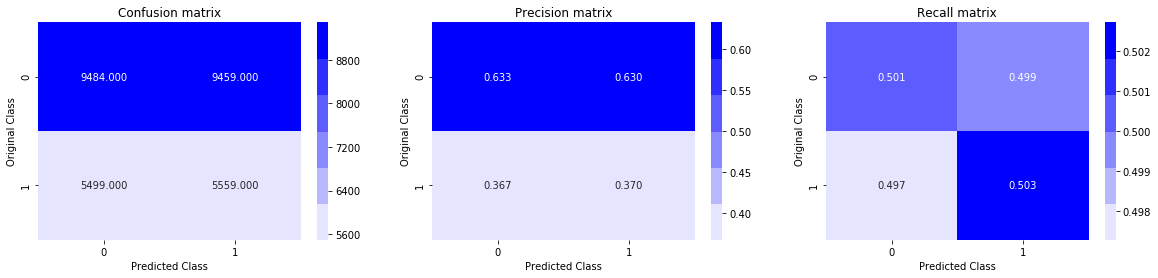

In [39]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='uniform',random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

<h2>Linear SVM</h2>


[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]
For values of alpha =  1e-05 The log loss is: 0.6581997588087657
For values of alpha =  0.0001 The log loss is: 0.4907944419498655
For values of alpha =  0.001 The log loss is: 0.5292594837246404
For values of alpha =  0.01 The log loss is: 0.5723449607270193
For values of alpha =  0.1 The log loss is: 0.5962580701660344
For values of alpha =  1 The log loss is: 0.6227084506322959
For values of alpha =  10 The log loss is: 0.6475879817123101


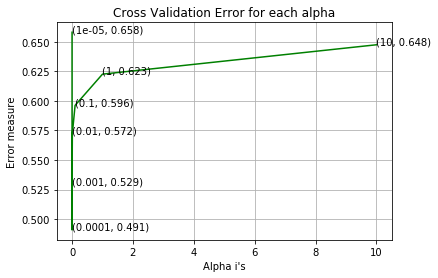

For values of best alpha =  0.0001 The train log loss is: 0.48072610705081387
For values of best alpha =  0.0001 The test log loss is: 0.4907944419498655
Total number of data points : 30001


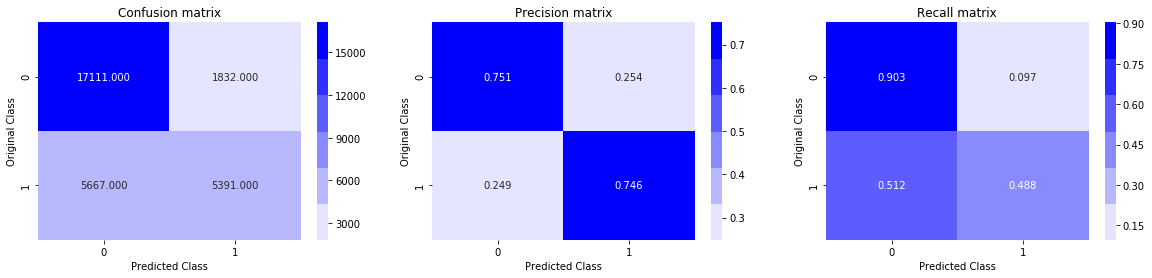

In [43]:
import warnings
warnings.filterwarnings('ignore')

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
print(alpha)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    y_proba = sig_clf.predict_proba(X_test)
    loss = log_loss(y_test, y_proba, labels=clf.classes_, eps=1e-15)
    log_error_array.append(loss)
    print('For values of alpha = ', i, "The log loss is:",loss)

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2>Logistic Regression</h2>

For values of alpha =  1e-05 The log loss is: 0.5585632222425049
For values of alpha =  0.0001 The log loss is: 0.5221368362787281
For values of alpha =  0.001 The log loss is: 0.5167402691038634
For values of alpha =  0.01 The log loss is: 0.5163416852442421
For values of alpha =  0.1 The log loss is: 0.5278620315465049
For values of alpha =  1 The log loss is: 0.5103620190757633
For values of alpha =  10 The log loss is: 0.5190635165444196


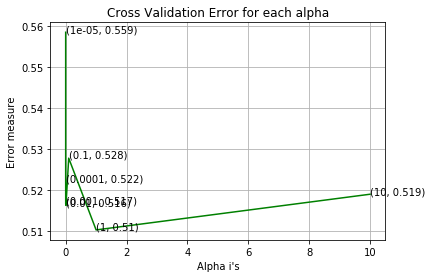

For values of best alpha =  1 The train log loss is: 0.502196201663181
For values of best alpha =  1 The test log loss is: 0.5103620190757633
Total number of data points : 30001


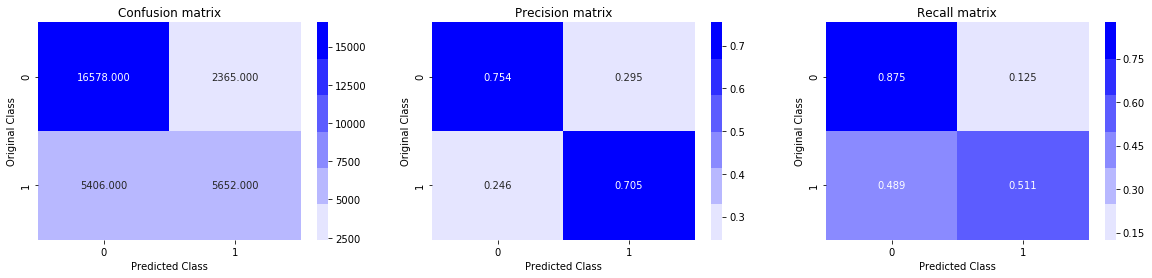

In [44]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.



log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

[0]	train-logloss:0.684941	valid-logloss:0.684905
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615762	valid-logloss:0.615922
[20]	train-logloss:0.564643	valid-logloss:0.564788
[30]	train-logloss:0.526598	valid-logloss:0.526808
[40]	train-logloss:0.497251	valid-logloss:0.497478
[50]	train-logloss:0.474183	valid-logloss:0.474343
[60]	train-logloss:0.455922	valid-logloss:0.456083
[70]	train-logloss:0.441294	valid-logloss:0.441525
[80]	train-logloss:0.429542	valid-logloss:0.429815
[90]	train-logloss:0.419823	valid-logloss:0.420154
[100]	train-logloss:0.411822	valid-logloss:0.412316
[110]	train-logloss:0.405084	valid-logloss:0.405633
[120]	train-logloss:0.399354	valid-logloss:0.39999
[130]	train-logloss:0.394483	valid-logloss:0.395237
[140]	train-logloss:0.390299	valid-logloss:0.391168
[150]	train-logloss:0.386618	valid-logloss:0.387552
[160]	train-logloss:0.383474	

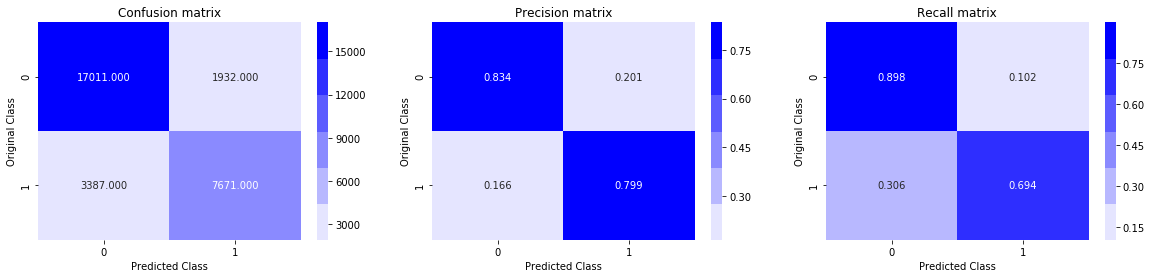

In [48]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
X_train = np.array(X_train)
X_test = np.array(X_test)
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2>Improvements</h2>

* Hyperparameter tuning 
* ensemble 
* ANN
* maybe other classical algorithms

In [50]:
 from joblib import dump, load
#saving model
dump(bst, "quora.joblib.dat")
#loading model
m = load('quora.joblib.dat')

['quora.joblib.dat']